In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Load dataset
data = pd.read_csv("features.csv")

In [3]:
data.head()

,Video Path,Label,Avg Retina Distance Ratio,Total Blinks,Blink Rate (per min),Face Movement Ratio,Face Fake Movement,Avg Lip Movement Ratio,Lip Wrinkle Ratio
0,C:\Users\SAYAN\Desktop\deepfake_detection\real...,Real,0.895287,16,32.868240,1.368737,No,0.094543,0.923144
1,C:\Users\SAYAN\Desktop\deepfake_detection\real...,Real,0.582324,2,9.801172,0.907706,No,0.160813,0.924313
2,C:\Users\SAYAN\Desktop\deepfake_detection\real...,Real,1.087512,0,0.000000,1.018733,No,0.198589,1.061375
3,C:\Users\SAYAN\Desktop\deepfake_detection\real...,Real,0.864012,1,2.935258,1.002337,No,0.109948,0.945363
4,C:\Users\SAYAN\Desktop\deepfake_detection\real...,Real,0.898788,3,8.261140,0.964145,No,0.162630,1.176435


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Video Path                 940 non-null    object 
 1   Label                      940 non-null    object 
 2   Avg Retina Distance Ratio  940 non-null    float64
 3   Total Blinks               940 non-null    int64  
 4   Blink Rate (per min)       940 non-null    float64
 5   Face Movement Ratio        940 non-null    float64
 6   Face Fake Movement         940 non-null    object 
 7   Avg Lip Movement Ratio     940 non-null    float64
 8   Lip Wrinkle Ratio          940 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 66.2+ KB


Label
Fake    762
Real    178
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20764\44441339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='Set2')


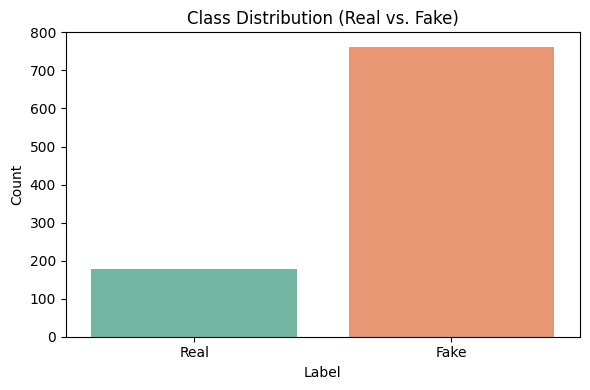

(None,
 Label
 Fake    762
 Real    178
 Name: count, dtype: int64)

In [5]:
# Check class distribution
class_counts = data['Label'].value_counts()
print(class_counts)
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data, palette='Set2')
plt.title("Class Distribution (Real vs. Fake)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show(), class_counts


In [6]:
# Convert 'Label' to categorical for plotting
data['Label'] = data['Label'].astype('category')
# List of numeric features to analyze
numeric_features = [
    'Avg Retina Distance Ratio',
    'Total Blinks',
    'Blink Rate (per min)',
    'Face Movement Ratio',
    'Avg Lip Movement Ratio',
    'Lip Wrinkle Ratio'
]
data[numeric_features].describe()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Avg Retina Distance Ratio,Total Blinks,Blink Rate (per min),Face Movement Ratio,Avg Lip Movement Ratio,Lip Wrinkle Ratio
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.997770,6.094681,21.457188,inf,0.107102,0.970372
std,0.194744,3.172461,10.878604,NaN,0.046683,0.115674
min,0.580064,0.000000,0.000000,0.548088,0.005897,0.217186
25%,0.857194,4.000000,13.998715,0.969207,0.073837,0.909777
50%,0.964552,6.000000,21.068727,1.005340,0.105515,0.970657
75%,1.133806,8.000000,28.285414,1.053956,0.135974,1.034559
max,1.620721,18.000000,65.381859,inf,0.296669,1.525681


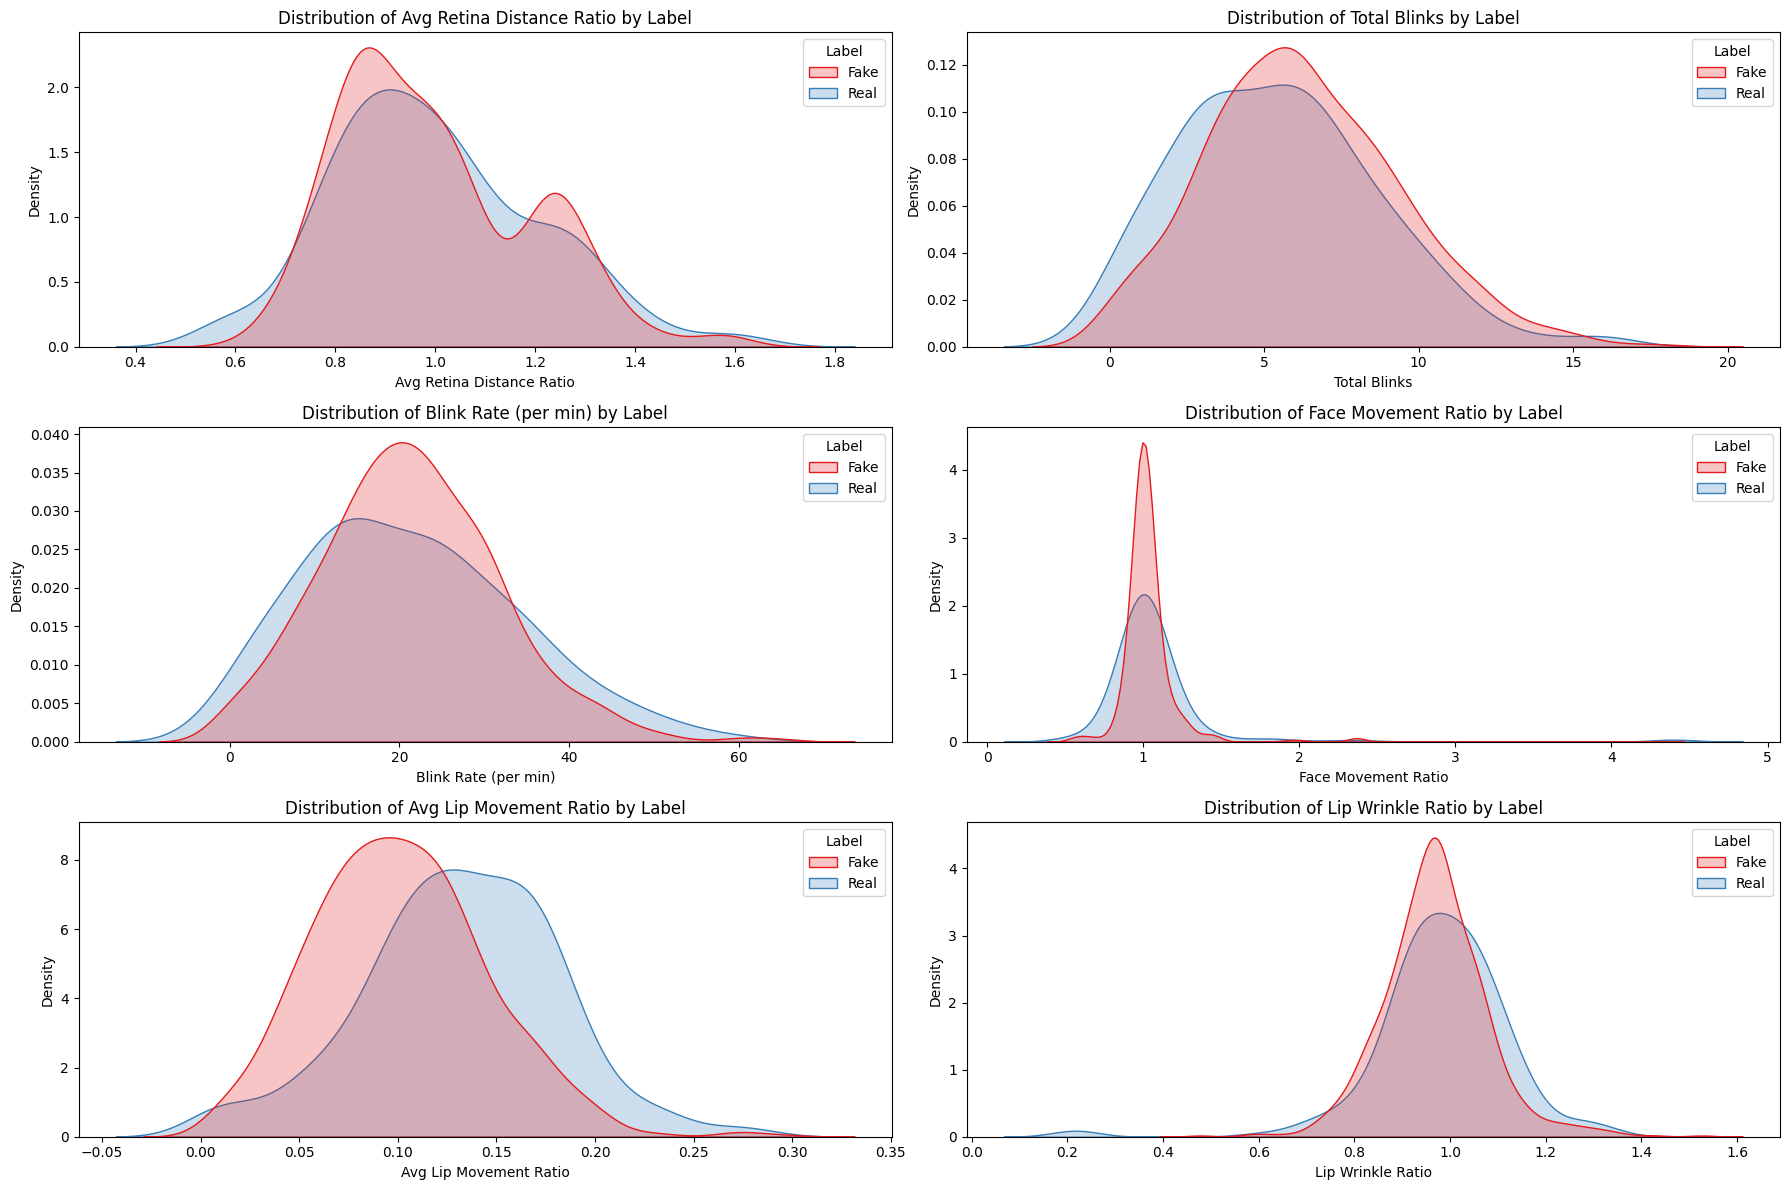

In [7]:
# Plot feature distributions
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=data, x=feature, hue='Label', fill=True, common_norm=False, palette='Set1')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [8]:
# Check the unique values and types of each supposed numeric column
feature_issues = {}

for col in numeric_features:
    unique_types = data[col].map(type).unique()
    unique_values_sample = data[col].unique()[:5]
    feature_issues[col] = {
        'types': unique_types,
        'sample_values': unique_values_sample
    }

feature_issues

{'Avg Retina Distance Ratio': {'types': array([<class 'float'>], dtype=object),
  'sample_values': array([0.89528731, 0.58232433, 1.08751215, 0.86401158, 0.89878823])},
 'Total Blinks': {'types': array([<class 'int'>], dtype=object),
  'sample_values': array([16,  2,  0,  1,  3], dtype=int64)},
 'Blink Rate (per min)': {'types': array([<class 'float'>], dtype=object),
  'sample_values': array([32.86823984,  9.80117202,  0.        ,  2.93525766,  8.26113953])},
 'Face Movement Ratio': {'types': array([<class 'float'>], dtype=object),
  'sample_values': array([1.36873681, 0.90770628, 1.01873325, 1.00233695, 0.96414516])},
 'Avg Lip Movement Ratio': {'types': array([<class 'float'>], dtype=object),
  'sample_values': array([0.09454279, 0.16081309, 0.19858886, 0.10994759, 0.16262967])},
 'Lip Wrinkle Ratio': {'types': array([<class 'float'>], dtype=object),
  'sample_values': array([0.92314354, 0.92431291, 1.0613748 , 0.94536302, 1.17643529])}}

In [9]:
# Check for non-numeric values in numeric columns
for col in numeric_features:
    print(col, data[col].map(type).value_counts())

Avg Retina Distance Ratio Avg Retina Distance Ratio
<class 'float'>    940
Name: count, dtype: int64
Total Blinks Total Blinks
<class 'int'>    940
Name: count, dtype: int64
Blink Rate (per min) Blink Rate (per min)
<class 'float'>    940
Name: count, dtype: int64
Face Movement Ratio Face Movement Ratio
<class 'float'>    940
Name: count, dtype: int64
Avg Lip Movement Ratio Avg Lip Movement Ratio
<class 'float'>    940
Name: count, dtype: int64
Lip Wrinkle Ratio Lip Wrinkle Ratio
<class 'float'>    940
Name: count, dtype: int64


In [10]:
#Convert all numeric columns explicitly:
for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data[numeric_features]

,Avg Retina Distance Ratio,Total Blinks,Blink Rate (per min),Face Movement Ratio,Avg Lip Movement Ratio,Lip Wrinkle Ratio
0,0.895287,16,32.868240,1.368737,0.094543,0.923144
1,0.582324,2,9.801172,0.907706,0.160813,0.924313
2,1.087512,0,0.000000,1.018733,0.198589,1.061375
3,0.864012,1,2.935258,1.002337,0.109948,0.945363
4,0.898788,3,8.261140,0.964145,0.162630,1.176435
...,...,...,...,...,...,...
935,0.829357,8,26.667301,0.981027,0.072868,0.934160
936,1.222715,9,33.570345,0.953051,0.059996,1.064007
937,0.764682,7,27.231531,0.999520,0.073833,0.930218
938,1.030960,12,46.789173,1.029356,0.073708,0.970725


In [11]:
#Drop or impute NaNs after conversion:
data[numeric_features].isnull().sum()

Avg Retina Distance Ratio    0
Total Blinks                 0
Blink Rate (per min)         0
Face Movement Ratio          0
Avg Lip Movement Ratio       0
Lip Wrinkle Ratio            0
dtype: int64

In [12]:
# data.to_csv("features_cleaned.csv", index=False)

In [13]:
print(data.shape)
print(data.dtypes)


(940, 9)
Video Path                     object
Label                        category
Avg Retina Distance Ratio     float64
Total Blinks                    int64
Blink Rate (per min)          float64
Face Movement Ratio           float64
Face Fake Movement             object
Avg Lip Movement Ratio        float64
Lip Wrinkle Ratio             float64
dtype: object


In [14]:
data.columns

Index(['Video Path', 'Label', 'Avg Retina Distance Ratio', 'Total Blinks',
       'Blink Rate (per min)', 'Face Movement Ratio', 'Face Fake Movement',
       'Avg Lip Movement Ratio', 'Lip Wrinkle Ratio'],
      dtype='object')

In [15]:
# map the labels to 0 and 1
data['Label'] = data['Label'].map({'Real': 0, 'Fake': 1})
data['Label'].value_counts()

Label
1    762
0    178
Name: count, dtype: int64

In [16]:
# Encode 'Face Fake Movement': Yes = 1, No = 0
data['Face Fake Movement'] = data['Face Fake Movement'].map({'Yes': 1, 'No': 0})

In [17]:
data['Face Fake Movement'].value_counts()

Face Fake Movement
0    907
1     33
Name: count, dtype: int64

In [ ]:
x = data[numeric_features]
y = data['Label']


In [24]:
x.head(-5)

,Avg Retina Distance Ratio,Total Blinks,Blink Rate (per min),Face Movement Ratio,Avg Lip Movement Ratio,Lip Wrinkle Ratio
0,0.895287,16,32.868240,1.368737,0.094543,0.923144
1,0.582324,2,9.801172,0.907706,0.160813,0.924313
2,1.087512,0,0.000000,1.018733,0.198589,1.061375
3,0.864012,1,2.935258,1.002337,0.109948,0.945363
4,0.898788,3,8.261140,0.964145,0.162630,1.176435
...,...,...,...,...,...,...
930,1.064403,0,0.000000,1.109694,0.112891,0.721256
931,0.952977,3,9.606580,0.987732,0.158828,0.979904
932,0.989544,5,16.231626,1.000153,0.152232,0.899438
933,0.881385,4,15.789143,1.437639,0.054813,0.914866


In [23]:
y.head(-5)

0      0
1      0
2      0
3      0
4      0
      ..
930    1
931    1
932    1
933    1
934    1
Name: Label, Length: 935, dtype: category
Categories (2, int64): [1, 0]

In [25]:
x.drop('Total Blinks', axis=1, inplace=True)
x.head(-5)

C:\Users\User\AppData\Local\Temp\ipykernel_20764\2925390874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('Total Blinks', axis=1, inplace=True)


,Avg Retina Distance Ratio,Blink Rate (per min),Face Movement Ratio,Avg Lip Movement Ratio,Lip Wrinkle Ratio
0,0.895287,32.868240,1.368737,0.094543,0.923144
1,0.582324,9.801172,0.907706,0.160813,0.924313
2,1.087512,0.000000,1.018733,0.198589,1.061375
3,0.864012,2.935258,1.002337,0.109948,0.945363
4,0.898788,8.261140,0.964145,0.162630,1.176435
...,...,...,...,...,...
930,1.064403,0.000000,1.109694,0.112891,0.721256
931,0.952977,9.606580,0.987732,0.158828,0.979904
932,0.989544,16.231626,1.000153,0.152232,0.899438
933,0.881385,15.789143,1.437639,0.054813,0.914866


In [37]:
x.replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_20764\1497292936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inplace=True)


In [41]:
x.isna().sum()


Avg Retina Distance Ratio    0
Blink Rate (per min)         0
Face Movement Ratio          0
Avg Lip Movement Ratio       0
Lip Wrinkle Ratio            0
dtype: int64

In [42]:
# Fill NaN values with the mean of each column
x.fillna(x.mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20764\1038251306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(x.mean(), inplace=True)


In [43]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train labels: {y_train.value_counts()}")
print(f"Test labels: {y_test.value_counts()}")

Train shape: (752, 5), Test shape: (188, 5)
Train labels: Label
1    610
0    142
Name: count, dtype: int64
Test labels: Label
1    152
0     36
Name: count, dtype: int64


In [45]:
y_train.value_counts()

Label
1    610
0    142
Name: count, dtype: int64

In [46]:
y_test.value_counts()


Label
1    152
0     36
Name: count, dtype: int64

In [47]:
# Create and train the model
model = LogisticRegression(max_iter=1000)

In [48]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [49]:
# Predict on test set
y_pred = model.predict(X_test)

In [50]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [51]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0  36]
 [  0 152]]


In [53]:
# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.81      1.00      0.89       152

    accuracy                           0.81       188
   macro avg       0.40      0.50      0.45       188
weighted avg       0.65      0.81      0.72       188



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [62]:
# Train with class_weight to handle imbalance
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
# Predict on test set
y_pred = model_rf.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))
y_pred

Test accuracy: 0.8457446808510638


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [70]:
# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  9  27]
 [  2 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.25      0.38        36
           1       0.85      0.99      0.91       152

    accuracy                           0.85       188
   macro avg       0.83      0.62      0.65       188
weighted avg       0.84      0.85      0.81       188



In [65]:
#decision tree
model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [66]:
y_pred = model_dt.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.7127659574468085


In [67]:
# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 12  24]
 [ 30 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.33      0.31        36
           1       0.84      0.80      0.82       152

    accuracy                           0.71       188
   macro avg       0.56      0.57      0.56       188
weighted avg       0.73      0.71      0.72       188



Model loaded and predictions match!
Feature ranking:
1. feature Avg Lip Movement Ratio (0.2709)
2. feature Blink Rate (per min) (0.1909)
3. feature Lip Wrinkle Ratio (0.1807)
4. feature Avg Retina Distance Ratio (0.1804)
5. feature Face Movement Ratio (0.1770)


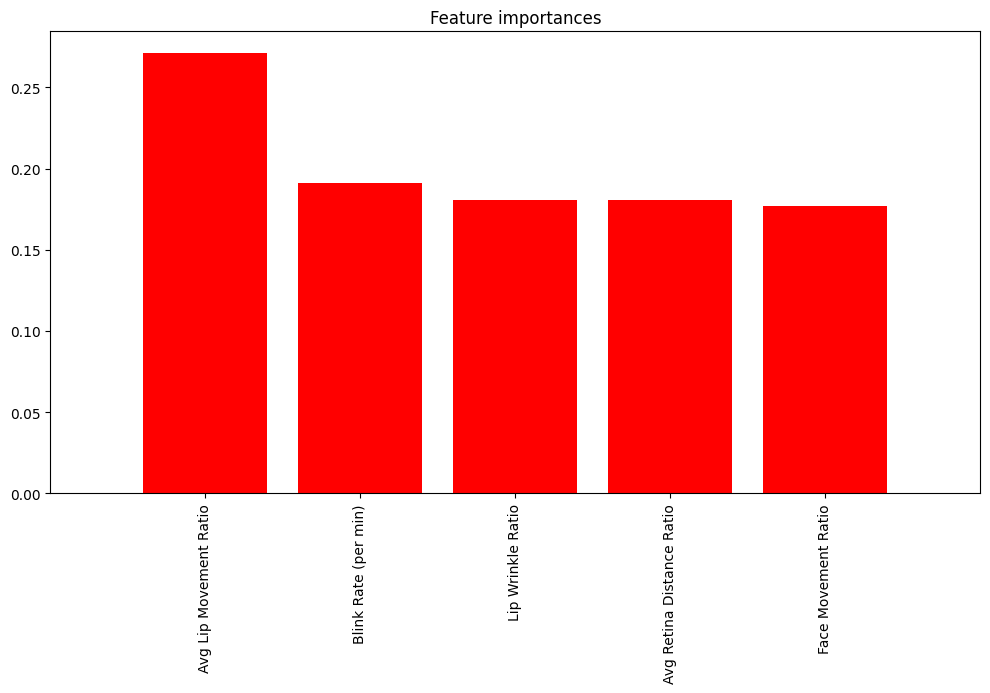

In [71]:
# save the model
joblib.dump(model_rf, 'model_rf.pkl')
# Load the model
loaded_model = joblib.load('model_rf.pkl')
# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
# Check if the predictions are the same
assert np.array_equal(y_pred, y_pred_loaded), "Predictions do not match!"   
print("Model loaded and predictions match!")
# Feature importance
importances = model_rf.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")
# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
